In [57]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [58]:
mask_folder = r"C:\Users\Su Yee Mon\Desktop\images+segmentation(25-49)\SegmentationClass (25-49)"
save_folder = r"C:\Users\Su Yee Mon\Desktop\images+segmentation(25-49)\encoded_mask"


In [59]:
os.makedirs(save_folder, exist_ok=True)

In [60]:
# Encode mask function
def encode_mask(mask_bgr):
    encoded = np.zeros(mask_bgr.shape[:2], dtype=np.uint8)
    
    # background = black
    encoded[np.all(mask_bgr == [0,0,0], axis=-1)] = 0
    
    # cat = green
    green_mask = (mask_bgr[:,:,1] > 100) & (mask_bgr[:,:,0] < 50) & (mask_bgr[:,:,2] < 50)
    encoded[green_mask] = 1
    
    # dog = red (optional)
    red_mask = (mask_bgr[:,:,2] > 100) & (mask_bgr[:,:,0] < 50) & (mask_bgr[:,:,1] < 50)
    encoded[red_mask] = 2
    
    return encoded

In [61]:
# Loop through all images in the mask folder
for mask_filename in os.listdir(mask_folder):
    mask_path = os.path.join(mask_folder, mask_filename)
    
    # Read mask image
    mask_img = cv2.imread(mask_path, cv2.IMREAD_COLOR)
    if mask_img is None:
        print(f"Warning: Could not read {mask_filename}")
        continue
    
    # Encode
    encoded_mask = encode_mask(mask_img)
    
    # Save encoded mask
    save_path = os.path.join(save_folder, mask_filename)
    cv2.imwrite(save_path, encoded_mask)
    print(f"Saved encoded mask: {save_path}")

print("All masks have been encoded and saved.")

Saved encoded mask: C:\Users\Su Yee Mon\Desktop\images+segmentation(25-49)\encoded_mask\cat.25.png
Saved encoded mask: C:\Users\Su Yee Mon\Desktop\images+segmentation(25-49)\encoded_mask\cat.26.png
Saved encoded mask: C:\Users\Su Yee Mon\Desktop\images+segmentation(25-49)\encoded_mask\cat.27.png
Saved encoded mask: C:\Users\Su Yee Mon\Desktop\images+segmentation(25-49)\encoded_mask\cat.28.png
Saved encoded mask: C:\Users\Su Yee Mon\Desktop\images+segmentation(25-49)\encoded_mask\cat.29.png
Saved encoded mask: C:\Users\Su Yee Mon\Desktop\images+segmentation(25-49)\encoded_mask\cat.30.png
Saved encoded mask: C:\Users\Su Yee Mon\Desktop\images+segmentation(25-49)\encoded_mask\cat.31.png
Saved encoded mask: C:\Users\Su Yee Mon\Desktop\images+segmentation(25-49)\encoded_mask\cat.32.png
Saved encoded mask: C:\Users\Su Yee Mon\Desktop\images+segmentation(25-49)\encoded_mask\cat.33.png
Saved encoded mask: C:\Users\Su Yee Mon\Desktop\images+segmentation(25-49)\encoded_mask\cat.34.png
Saved enco

Unique values in this mask: {np.uint8(0), np.uint8(2)}


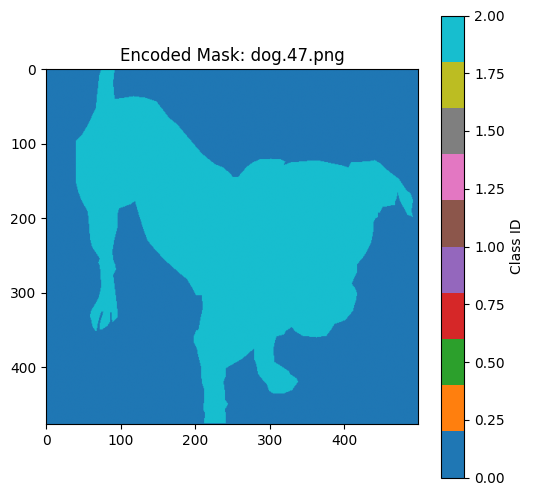

: 

In [ ]:
# Choose a sample file to check
sample_file = "dog.47.png"
sample_path = os.path.join(save_folder, sample_file)

# Load the encoded mask (grayscale)
encoded_mask = cv2.imread(sample_path, cv2.IMREAD_UNCHANGED)

# Check unique values (class IDs)
print("Unique values in this mask:", set(encoded_mask.flatten()))

# Visualize
plt.figure(figsize=(6,6))
plt.imshow(encoded_mask, cmap="tab10")  # tab10 gives distinct colors for each class
plt.colorbar(label="Class ID")
plt.title(f"Encoded Mask: {sample_file}")
plt.show()

TypeError: Image data of dtype <U134 cannot be converted to float

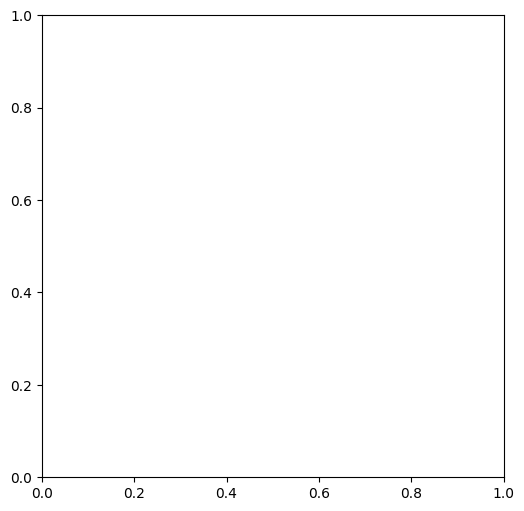

In [51]:
plt.figure(figsize=(6,6))
plt.imshow(mask_path, cmap="tab10")
plt.colorbar(label="Class ID")
plt.title("Encoded Mask")
plt.show()

In [50]:
mask_path = r"C:\Users\Su Yee Mon\Desktop\Practical-ML-by-WAI-main\Practical_summer_ML\4_image_processing_techniques\img_lab\encoded_mask\cat.50.png"

In [36]:
mask_img = cv2.imread(mask_path, cv2.IMREAD_COLOR)   # BGR
print("Mask shape:", mask_img.shape)

Mask shape: (300, 300, 3)


In [37]:
print("Shape:", mask_img.shape)
print("Unique colors in mask:")
unique_colors = np.unique(mask_img.reshape(-1, 3), axis=0)
print(unique_colors)

Shape: (300, 300, 3)
Unique colors in mask:
[[  0   0   0]
 [  0   0 128]]


In [38]:
def encode_mask(mask_bgr):
    encoded = np.zeros(mask_bgr.shape[:2], dtype=np.uint8)
    
    # background = black
    encoded[np.all(mask_bgr == [0,0,0], axis=-1)] = 0
    
    # cat = green
    green_mask = (mask_bgr[:,:,1] > 100) & (mask_bgr[:,:,0] < 50) & (mask_bgr[:,:,2] < 50)
    encoded[green_mask] = 1
    
    # dog = red (for future masks)
    red_mask = (mask_bgr[:,:,2] > 100) & (mask_bgr[:,:,0] < 50) & (mask_bgr[:,:,1] < 50)
    encoded[red_mask] = 2
    
    return encoded

In [39]:
encoded_mask = encode_mask(mask_img)

# Verify
print("Unique values:", np.unique(encoded_mask))

Unique values: [0 2]


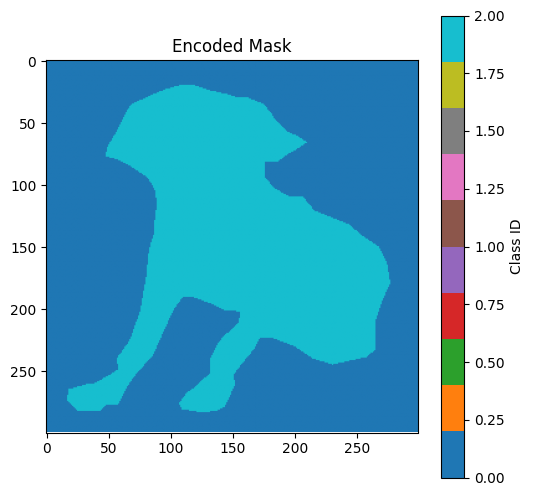

In [40]:
plt.figure(figsize=(6,6))
plt.imshow(encoded_mask, cmap="tab10")
plt.colorbar(label="Class ID")
plt.title("Encoded Mask")
plt.show()

In [33]:
save_folder = r"C:\Users\Su Yee Mon\Desktop\Practical-ML-by-WAI-main\Practical_summer_ML\4_image_processing_techniques\img_lab\encoded_mask"
# Make sure folder exists
os.makedirs(save_folder, exist_ok=True)

# File name for your encoded mask
mask_filename = "cat.50.png"  # or any name you like

# Full path to save
save_path = os.path.join(save_folder, mask_filename)

# Save encoded mask
cv2.imwrite(save_path, encoded_mask)

print("Encoded mask saved at:", save_path)

Encoded mask saved at: C:\Users\Su Yee Mon\Desktop\Practical-ML-by-WAI-main\Practical_summer_ML\4_image_processing_techniques\img_lab\encoded_mask\cat.50.png
